In [548]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from newsapi import NewsApiClient
import joblib
import json
import pickle
import h5py
from sklearn.metrics import f1_score
import nltk
from nltk.corpus import stopwords
import statistics

In [549]:
df = pd.read_csv("csv_file/data.csv")

In [550]:
count_words = []
count_words_alnum = []
for i in df["headlines"]:
    word = i.split()
    word = ' '.join(letter for letter in word if letter.isalnum())
    count_words.append(word)

for i in count_words:
    i = i.split(" ")
    count_words_alnum.append(i)

In [551]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

flatten_list = flatten_extend(count_words_alnum)

In [552]:
flatten_list_unique = set(flatten_list)

In [553]:
print(len(flatten_list_unique))

12137


In [554]:
for index, i in enumerate(df["headlines"]):
    row = df["headlines"].iloc[index]
    row = row.split(" ")
    row = ' '.join(letter for letter in row if letter.isalnum() or letter == "COVID-19")
    if "COVID-19" in row:
        row = row.replace("COVID-19", "COVID19")
    replace = df["headlines"].iloc[index]
    df = df.replace(to_replace=replace, value=row)


In [555]:
for i in range(15):
    print(df["headlines"].iloc[i])

A post claims compulsory vacination violates the principles of that coronavirus that the PCR test returns many false and that influenza vaccine is related to
A photo claims that this person is a doctor who died after attending to too many COVID19 patinents in Hospital in Buenos
Post about a video claims that it is a protest against confination in the town of Aranda de Duero
All deaths by respiratory failure and pneumonia are being registered as according to the Civil Registry
The dean of the College of Biologists of Euskadi states that there are a lot of PCR false positives and asymptomatic spread
Households with COVID19 patients in Porto Campo Grande and Santo da Platina must put a red ribbon on their garbage Garbagemen are instructed to handle them in a safer way
A chain lists recommendations to prevent and treat
Argentinian companies have closed due to all companies receiving government aid during the pandemic will be expropriated by the government
Social media posts criticize a pho

In [556]:
list_set = set(count_words)
unique_list = (list(list_set))
print(len(unique_list))

8796


In [557]:
# Sample data (you should replace this with your dataset)
texts = df["headlines"]
labels = df["outcome"]

# Tokenize and pad sequences
max_words = 12137  # Number of unique words to keep
maxlen = 75  # Maximum length of sequences

In [558]:
stopwords = nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soder\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [559]:
stopwords = nltk.corpus.stopwords.words('english')

In [560]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [561]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

In [562]:
word_index = tokenizer.word_index

In [563]:
word_index

{'the': 1,
 'a': 2,
 'in': 3,
 'of': 4,
 'to': 5,
 'and': 6,
 'coronavirus': 7,
 'that': 8,
 'is': 9,
 'covid19': 10,
 'for': 11,
 'on': 12,
 'from': 13,
 'with': 14,
 'has': 15,
 'are': 16,
 'video': 17,
 'by': 18,
 'people': 19,
 'was': 20,
 'an': 21,
 'shows': 22,
 'as': 23,
 'be': 24,
 'not': 25,
 'who': 26,
 'can': 27,
 'it': 28,
 'new': 29,
 'been': 30,
 'during': 31,
 'have': 32,
 'will': 33,
 'says': 34,
 'claims': 35,
 'claim': 36,
 'this': 37,
 'against': 38,
 'shared': 39,
 'at': 40,
 'after': 41,
 'novel': 42,
 'government': 43,
 'facebook': 44,
 'president': 45,
 'because': 46,
 'vaccine': 47,
 'due': 48,
 'health': 49,
 'infected': 50,
 'photo': 51,
 'you': 52,
 'they': 53,
 'lockdown': 54,
 'or': 55,
 'about': 56,
 'there': 57,
 'times': 58,
 'being': 59,
 'cure': 60,
 'chinese': 61,
 'china': 62,
 'which': 63,
 'posts': 64,
 'hospital': 65,
 'image': 66,
 'patients': 67,
 'their': 68,
 'said': 69,
 'india': 70,
 'social': 71,
 'were': 72,
 'he': 73,
 'his': 74,
 'no': 7

In [564]:
filtered_word_index = {word: index for word, index in word_index.items() if word.lower() not in stop_words}
    

In [565]:
print(len(filtered_word_index))

10239


In [566]:
tokenizer.word_index = filtered_word_index

In [567]:
sequences = tokenizer.texts_to_sequences(texts)

In [568]:
sequence_lengths = [len(seq) for seq in sequences]

In [569]:
print(statistics.mean(sequence_lengths))

14.231545926869915


In [570]:

X = pad_sequences(sequences, maxlen=maxlen)
y = np.array(labels)

In [571]:
# Build the RNN model
embedding_dim = 50  # Dimensionality of the embedding space
hidden_units = 50  # Number of LSTM units

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Train the model
epochs = 5
batch_size = 32

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/5
259/259 [==============================] - 15s 36ms/step - loss: 0.2069 - accuracy: 0.9519 - val_loss: 0.1777 - val_accuracy: 0.9477
Epoch 2/5
259/259 [==============================] - 9s 35ms/step - loss: 0.0949 - accuracy: 0.9697 - val_loss: 0.1101 - val_accuracy: 0.9673
Epoch 3/5
259/259 [==============================] - 9s 35ms/step - loss: 0.0343 - accuracy: 0.9896 - val_loss: 0.1279 - val_accuracy: 0.9728
Epoch 4/5
259/259 [==============================] - 9s 35ms/step - loss: 0.0134 - accuracy: 0.9965 - val_loss: 0.1467 - val_accuracy: 0.9728
Epoch 5/5
32/32 [==============================] - 0s 12ms/step - loss: 0.1423 - accuracy: 0.9696
Test Accuracy: 96.96%


In [572]:
X_train

array([[  0,   0,   0, ...,   5,  96,   1],
       [  0,   0,   0, ...,   5, 806, 211],
       [  0,   0,   0, ...,  19,  50,  14],
       ...,
       [  0,   0,   0, ..., 141,  31,   1],
       [  0,   0,   0, ..., 245, 932,   3],
       [  0,   0,   0, ...,  32, 166,   1]])

32/32 [==============================] - 1s 12ms/step


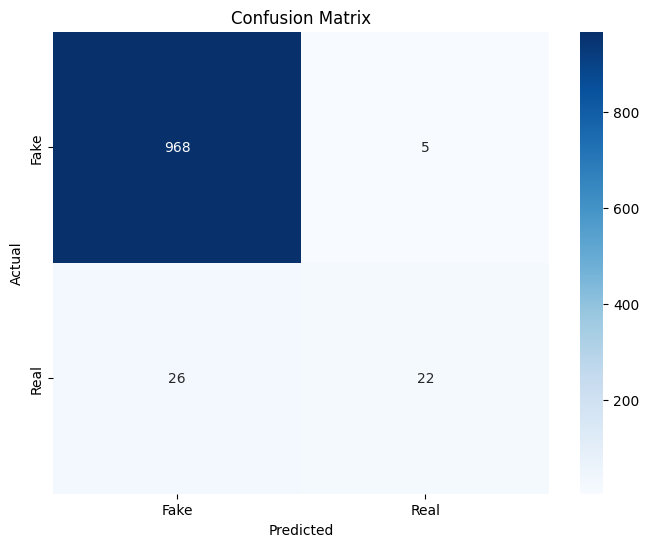

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       973
           1       0.81      0.46      0.59        48

    accuracy                           0.97      1021
   macro avg       0.89      0.73      0.79      1021
weighted avg       0.97      0.97      0.97      1021



In [573]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred_binary))

In [574]:
newsapi = NewsApiClient(api_key='2ec72918ca08491b885785649a92cfb7')  # Replace with your actual News API key

# /v2/top-headlines
covid_headlines = newsapi.get_top_headlines(q='covid',
                                            language='en',
                                            country='us')

# /v2/everything
covid_articles = newsapi.get_everything(q='covid',
                                        language='en',
                                        sort_by='relevancy',
                                        page=1)


title = []
clean_title = []
for article in covid_articles['articles']:
    print(article['title'])
    title.append(article['title'])

for index, i in enumerate(title):
    row = title[index]
    row = row.split(" ")
    row = ' '.join(letter for letter in row if letter.isalnum() or letter == "COVID-19")
    if "COVID-19" in row:
        row = row.replace("COVID-19", "COVID19")
    row = row.lower()
    clean_title.append(row)




“Mystery” pneumonia in China is mix of common respiratory germs, WHO says
Google shutters the COVID-19 exposure notification feature on Android
WHO seeks China data on 'pneumonia clusters' in children
Tenn. vaccine chief, fired after promoting COVID shots, gets $150K settlement
Endlesss Clubs is like a Discord server for making music
Are you a homeowner who has run into problems on a COVID mortgage forbearance?
The US Army is having a hard time recruiting. Now it's asking soldiers dismissed for refusing the COVID-19 vaccine to come back.
CDC airport COVID screening to include flu, RSV detection
CHART OF THE DAY: The extra money people saved during COVID is almost gone
The VA just paused VA loan foreclosures — here's what that means for borrowers
Government Makes More Free COVID Tests Available For The Holidays
More Free COVID-19 Tests Are Available for the Holiday Season
Could China’s Child Pneumonia Outbreak Spread? All You Need to Know
After a More Political Halloween in Shanghai, No

In [575]:
clean_title

['pneumonia in china is mix of common respiratory who says',
 'google shutters the covid19 exposure notification feature on android',
 'who seeks china data on in children',
 'vaccine fired after promoting covid gets settlement',
 'endlesss clubs is like a discord server for making music',
 'are you a homeowner who has run into problems on a covid mortgage',
 'the us army is having a hard time now asking soldiers dismissed for refusing the covid19 vaccine to come',
 'cdc airport covid screening to include rsv detection',
 'chart of the the extra money people saved during covid is almost gone',
 'the va just paused va loan foreclosures what that means for borrowers',
 'government makes more free covid tests available for the holidays',
 'more free covid19 tests are available for the holiday season',
 'could child pneumonia outbreak all you need to know',
 'after a more political halloween in now comes the crackdown',
 'rebound infections occur in of paxlovid according to new research',


In [576]:
# News API setup
newsapi = NewsApiClient(api_key='2ec72918ca08491b885785649a92cfb7')  # Replace with your actual News API key

# Query the News API
news_data = newsapi.get_everything(q='covid',
                                        language='en',
                                        sort_by='relevancy',
                                        page=1)


In [577]:
def preprocess_text(text):
    sequences = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequences, maxlen=maxlen)  # Ensure maxlen matches the length used during training
    print(padded_sequence)
    return padded_sequence

true_labels = []
predicted_labels = []
# Process and predict for each news article
for index, article in enumerate(clean_title):
    title = article
    if "covid" in title.lower():
        true_labels.append(1)
        print(title)
    else:
        true_labels.append(0)
   
        
    # Preprocess the text
    processed_title = preprocess_text(title)
    
    # Make predictions
    prediction = model.predict(processed_title)
    if prediction < 0.5:
        predicted_labels.append(0)
    else:
        predicted_labels.append(1)
    
   
    
    # Display results
    print(f"Title: {title}")
    print(f"Prediction: {'Fake' if prediction < 0.5 else 'Real'}")
    print("=" * 50)



[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0  869    3   62 2098
     4  711  694   26   34]]
1/1 [==============================] - 0s 29ms/step
Title: pneumonia in china is mix of common respiratory who says
Prediction: Fake
google shutters the covid19 exposure notification feature on android
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0  152    1   10
  2311 1358 4324   12 3616]]
1/1 [===============

In [578]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[71  9]
 [18  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        80
           1       0.18      0.10      0.13        20

    accuracy                           0.73       100
   macro avg       0.49      0.49      0.48       100
weighted avg       0.67      0.73      0.70       100

